### Importing Liabraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()

### Importing Data

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### Data Prepration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

### Checking Null Values

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

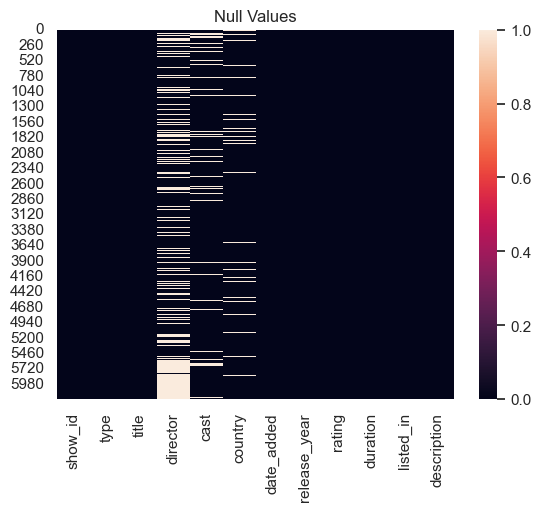

In [6]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [7]:
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('Country Unavailable', inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [8]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Spliting data based on the type (Movies and TV Shows)

In [9]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
df_movies = df[df['type']=='Movie']
df_tv_shows = df[df['type']=='TV Show']

In [11]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [12]:
df_tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [13]:
print(df_movies.shape)
print(df_tv_shows.shape)

(4257, 12)
(1957, 12)


In [14]:
df_movies.duration.unique()

array(['90 min', '94 min', '99 min', '110 min', '60 min', '78 min',
       '95 min', '58 min', '62 min', '65 min', '61 min', '135 min',
       '98 min', '96 min', '79 min', '113 min', '80 min', '77 min',
       '112 min', '106 min', '102 min', '114 min', '125 min', '142 min',
       '133 min', '100 min', '86 min', '146 min', '10 min', '122 min',
       '126 min', '116 min', '130 min', '70 min', '128 min', '88 min',
       '108 min', '93 min', '64 min', '107 min', '92 min', '111 min',
       '103 min', '40 min', '85 min', '72 min', '45 min', '89 min',
       '24 min', '127 min', '163 min', '117 min', '42 min', '104 min',
       '75 min', '82 min', '38 min', '97 min', '81 min', '91 min',
       '152 min', '87 min', '121 min', '101 min', '119 min', '83 min',
       '182 min', '124 min', '63 min', '139 min', '171 min', '84 min',
       '69 min', '76 min', '41 min', '153 min', '141 min', '52 min',
       '137 min', '132 min', '157 min', '109 min', '105 min', '25 min',
       '71 min', '123 

#### Let's remove the min and change the type of duration column in movies dataset to integer.

In [15]:
df_movies['duration'] = df_movies['duration'].apply(lambda x: x.split(' ')[0]).astype(int)

In [16]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [17]:
df_tv_shows.duration

2        1 Season
3        1 Season
5        1 Season
8        1 Season
26       1 Season
          ...    
6218    2 Seasons
6219    2 Seasons
6220    2 Seasons
6221    2 Seasons
6222    8 Seasons
Name: duration, Length: 1957, dtype: object

#### Let's remove Season from duration column in tv shows dataset and change the column to seasons.

In [18]:
df_tv_shows.rename(columns={'duration':'seasons'},inplace = True)

In [19]:
## Replace 1 Season to 1 Seasons so we can remove seasons from column
df_tv_shows['seasons'].replace('1 Season','1 Seasons',inplace=True)

In [20]:
df_tv_shows.seasons

2       1 Seasons
3       1 Seasons
5       1 Seasons
8       1 Seasons
26      1 Seasons
          ...    
6218    2 Seasons
6219    2 Seasons
6220    2 Seasons
6221    2 Seasons
6222    8 Seasons
Name: seasons, Length: 1957, dtype: object

In [21]:
df_tv_shows['seasons'] = df_tv_shows['seasons'].apply(lambda x: x.split(' ')[0]).astype(int)

In [22]:
df_tv_shows['seasons']

2       1
3       1
5       1
8       1
26      1
       ..
6218    2
6219    2
6220    2
6221    2
6222    8
Name: seasons, Length: 1957, dtype: int32

### Exploratory Data Analysis

- ### Let's see is there are more movies or tv shows released

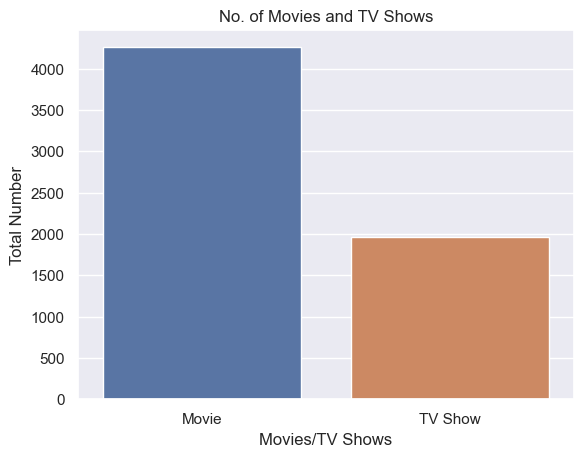

In [23]:
sns.countplot(x='type',data=df)
plt.title('No. of Movies and TV Shows')
plt.xlabel('Movies/TV Shows')
plt.ylabel('Total Number')
plt.show()

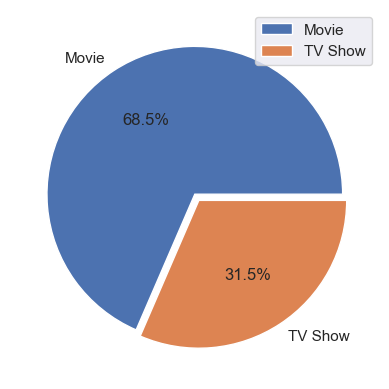

In [24]:
## Let's draw another type of graph
values = df.type.value_counts().values
labels = df.type.value_counts().index
plt.pie(values,labels=labels,explode=(0,0.05),autopct='%1.1f%%')
plt.legend()
plt.show()

### Observation:
- There are 4,000+ movies and almost 2,000 shows with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out as the majority. However, in terms of title, there are far more movie titles (68.5%) than TV show titles (31.5%).

### Ratings

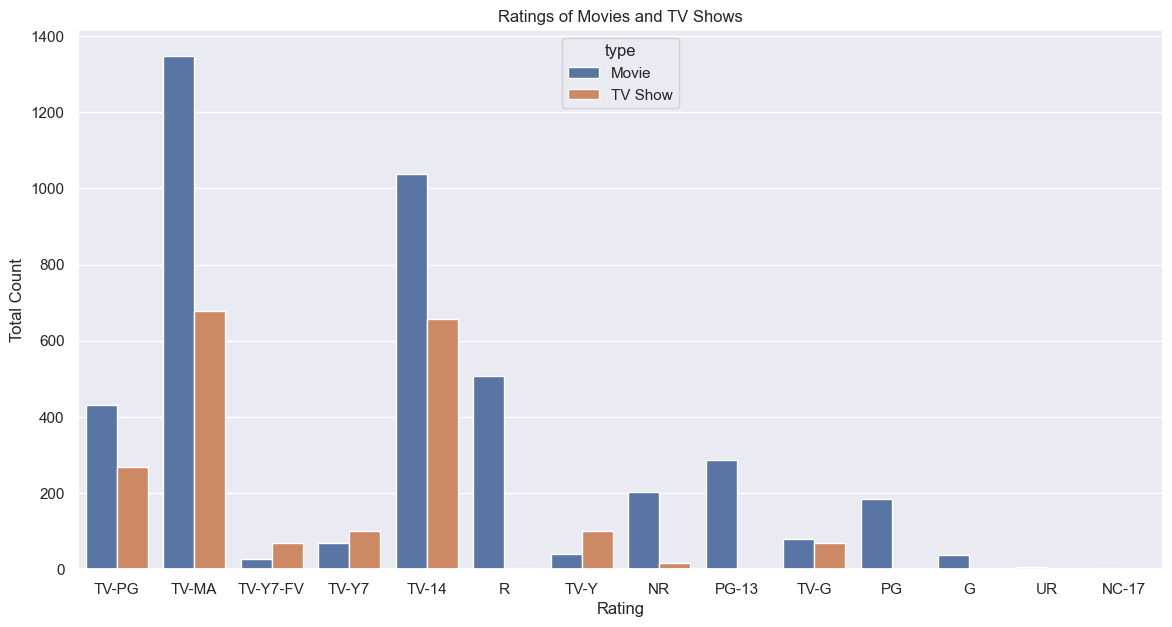

In [25]:
plt.figure(figsize=(14,7))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Ratings of Movies and TV Shows')
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

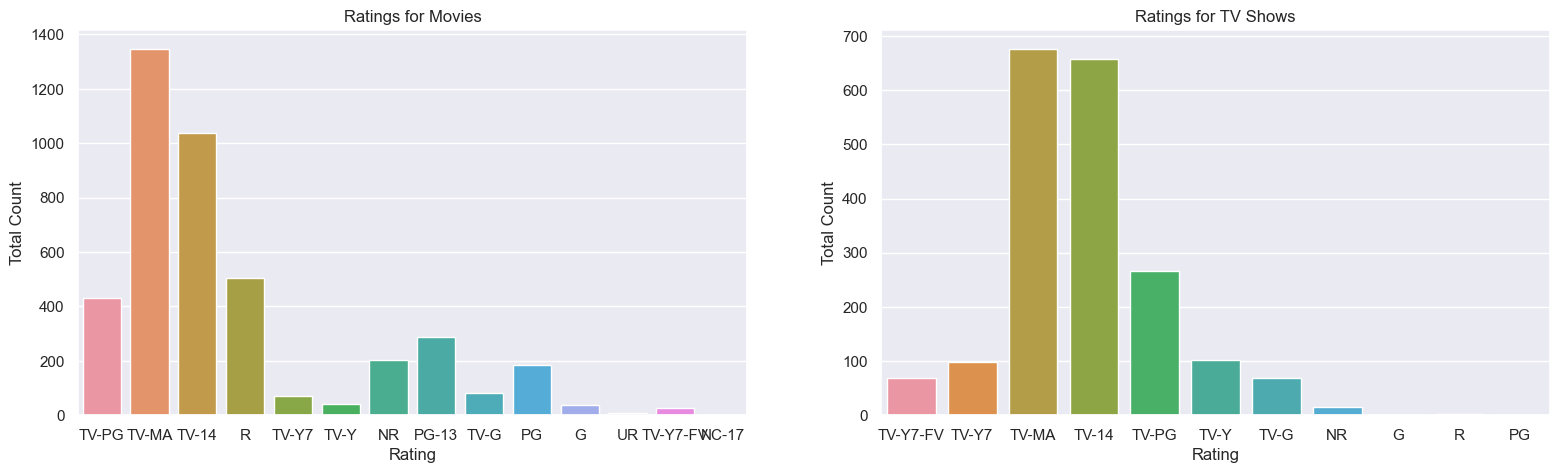

In [26]:
## Let's plot the ratings graph sepratley for movies and tv shows
figure,ax = plt.subplots(1,2,figsize=(19,5))
x1 = sns.countplot(x='rating',data=df_movies,ax=ax[0])
x1.set_title("Ratings for Movies")
x1.set_xlabel("Rating")
x1.set_ylabel("Total Count")
x2 = sns.countplot(x='rating',data=df_tv_shows,ax=ax[1])
x2.set_title("Ratings for TV Shows")
x2.set_xlabel("Rating")
x2.set_ylabel("Total Count")
figure.show()

### By Year

In [27]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df_movies['year_added'] = pd.DatetimeIndex(df_movies['date_added']).year
df_tv_shows['year_added'] = pd.DatetimeIndex(df_tv_shows['date_added']).year
df['month_added'] = pd.DatetimeIndex(df['date_added']).month
df_movies['month_added'] = pd.DatetimeIndex(df_movies['date_added']).month
df_tv_shows['month_added'] = pd.DatetimeIndex(df_tv_shows['date_added']).month

In [28]:
years = df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
years

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
4,2020,184
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7


In [29]:
movies_year = df_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
tv_show_year = df_tv_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})


In [30]:
movies_year

,year,count
0,2019,1546
1,2018,1290
2,2017,910
3,2016,262
4,2020,147
5,2015,56
6,2014,19
7,2011,13
8,2013,6
9,2012,4


In [31]:
tv_show_year

,year,count
0,2019,803
1,2018,491
2,2017,387
3,2016,191
4,2020,37
5,2015,32
6,2013,6
7,2014,6
8,2012,3
9,2008,1


In [32]:
years = years[years.year!=2020]
years

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7
10,2009,2


In [33]:
movies_year = movies_year[movies_year['year']!=2020]
tv_show_year = tv_show_year[tv_show_year['year']!=2020]

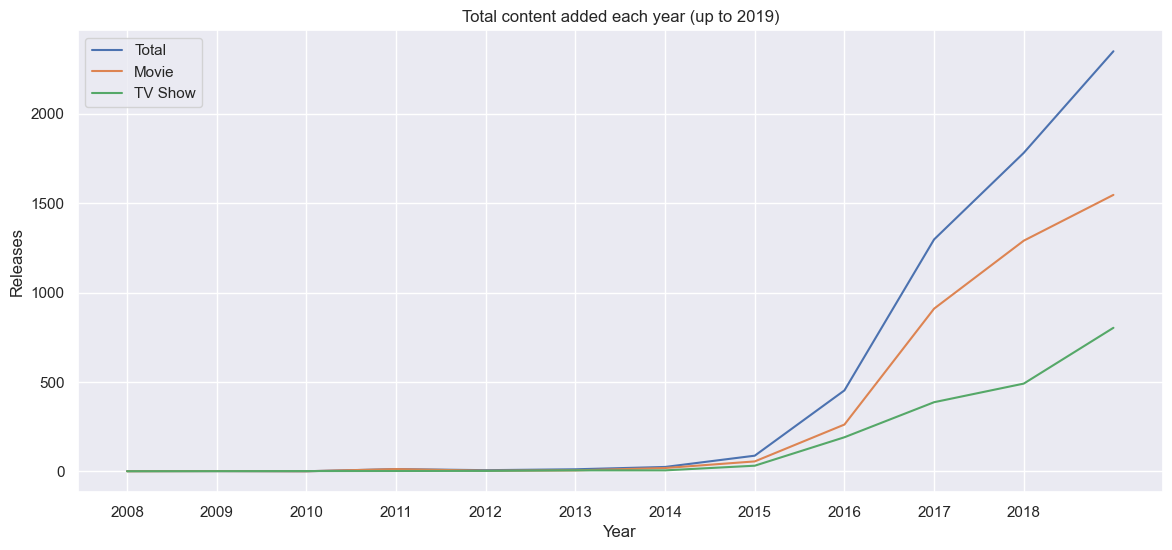

In [34]:
plt.figure(figsize=(14,6))
sns.lineplot(x='year',y='count',data=years)
sns.lineplot(x='year',y='count',data=movies_year)
sns.lineplot(x='year',y='count',data=tv_show_year)
plt.xticks(np.arange(2008,2019,1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

- Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. I decided to exclude content added during 2020 since the data does not include a full years worth of data. We can see that there has been a consistent growth in the number of movies on Netflix compared to shows.

### Movies and TV Shows added by months of year

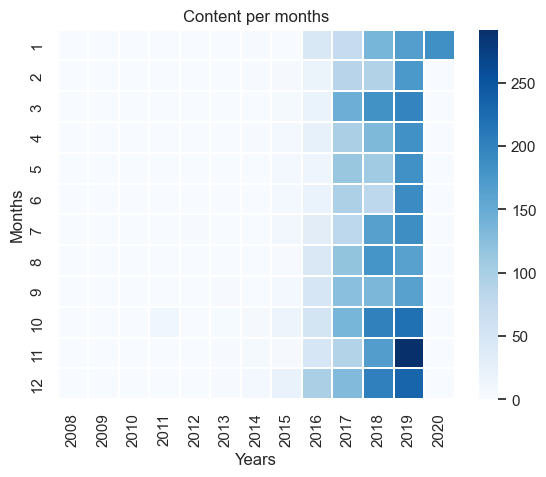

In [35]:
sns.heatmap(df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T,linewidths=0.020,cmap='Blues')
plt.title('Content per months')
plt.xlabel('Years')
plt.ylabel('Months')
plt.show()

- We can see that around 2014 is when Netflix began to increase their content count. We can see over the years and months, Netflix continues to slowly increase the amount of content that is being added into their platform. We can see in 2020, the data stops at January since that is the latest month available in the dataset.

### Movies Duration

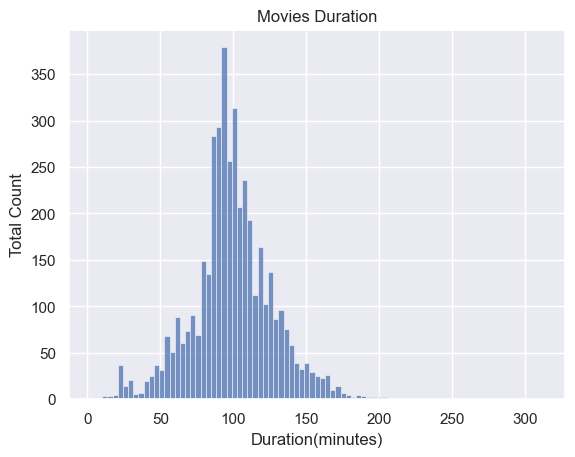

In [36]:
sns.histplot(x='duration',data=df_movies)
plt.xlabel("Duration(minutes)")
plt.ylabel("Total Count")
plt.title("Movies Duration")
plt.show()

### TV Show Seasons

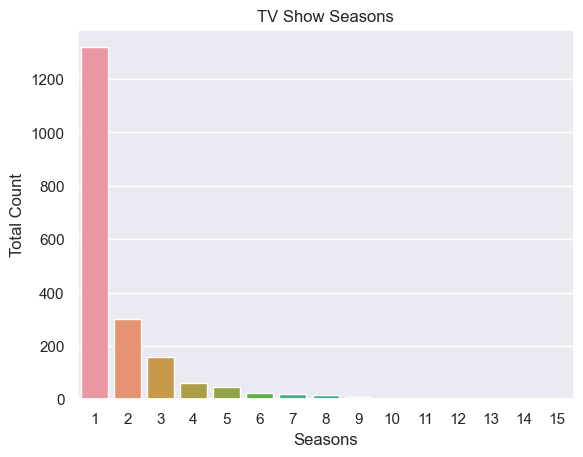

In [37]:
sns.countplot(x='seasons',data=df_tv_shows)
plt.xlabel("Seasons")
plt.ylabel("Total Count")
plt.title("TV Show Seasons")
plt.show()

### Countries with the most content available

In [38]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


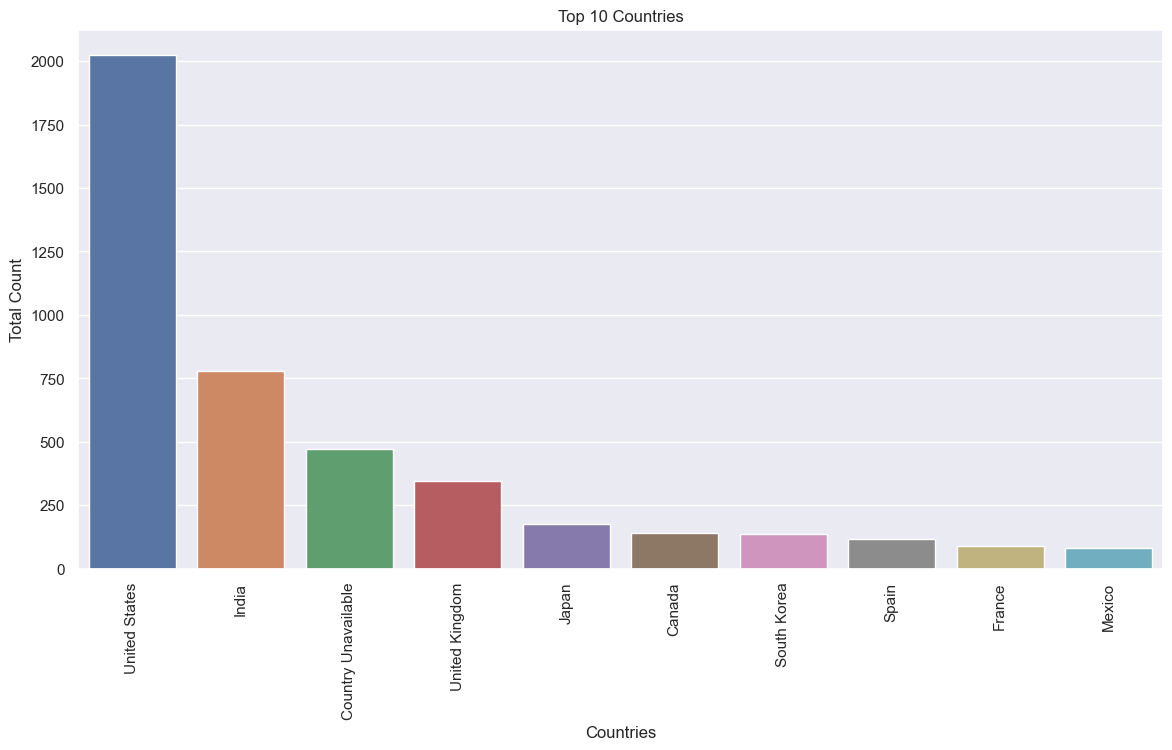

In [39]:
plt.figure(figsize=(14,7))
sns.countplot(df['country'],order=df['country'].value_counts().index[:10])
plt.title('Top 10 Countries')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Total Count')
plt.show()

- Removing Country Unavailable

In [40]:
countries = df[df['country']!='Country Unavailable'] 

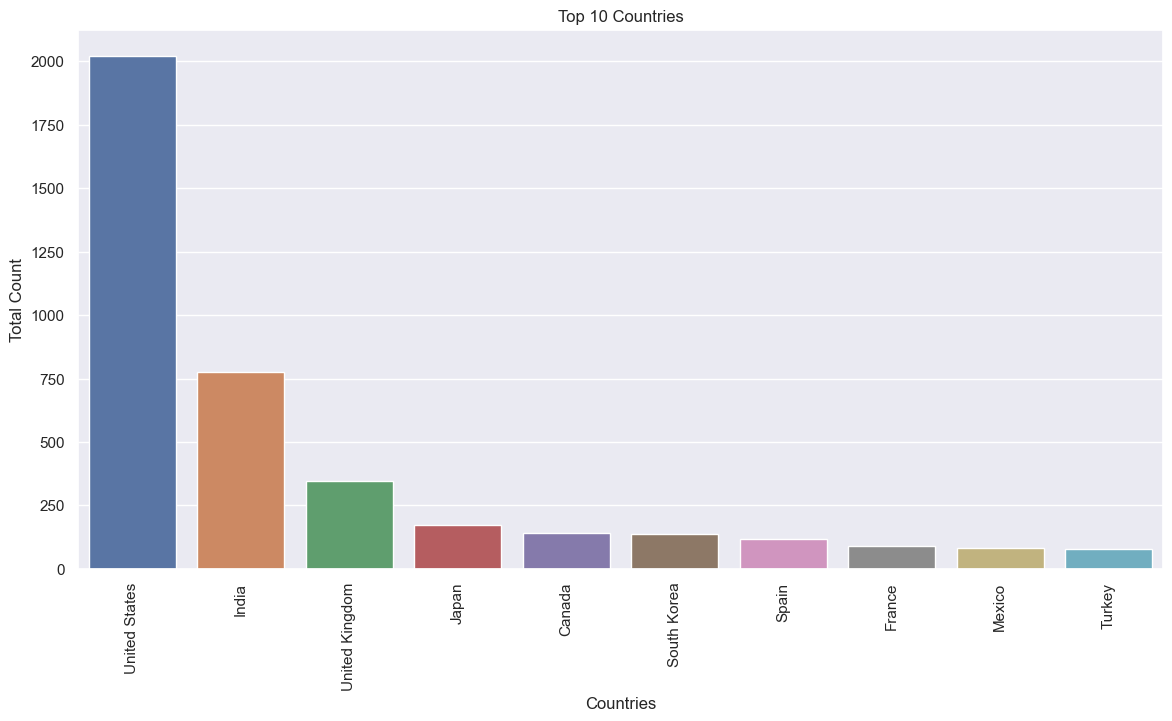

In [41]:
plt.figure(figsize=(14,7))
sns.countplot(countries['country'],order=countries['country'].value_counts().index[:10])
plt.title('Top 10 Countries')
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Total Count')
plt.show()

### Popular Genres

In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9


In [43]:
df['listed_in'].value_counts()

Documentaries                                             299
Stand-Up Comedy                                           273
Dramas, International Movies                              248
Dramas, Independent Movies, International Movies          186
Comedies, Dramas, International Movies                    174
                                                         ... 
British TV Shows, Reality TV, Romantic TV Shows             1
Reality TV, Science & Nature TV, TV Action & Adventure      1
Classic Movies, Dramas, LGBTQ Movies                        1
Crime TV Shows, TV Dramas, TV Sci-Fi & Fantasy              1
Reality TV, Spanish-Language TV Shows                       1
Name: listed_in, Length: 461, dtype: int64

In [44]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

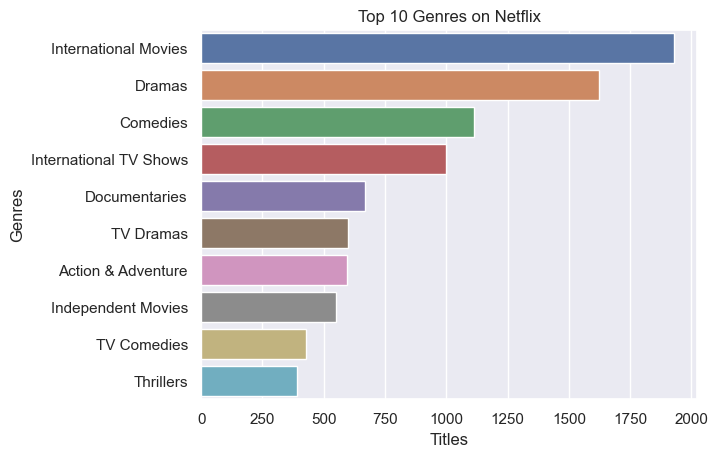

In [45]:
sns.countplot(y=filtered_genres,order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

### Top 10 Directors

In [46]:
filtered_directors = df[df['director']!='No Director'].set_index('title')['director'].str.split(',',expand=True).stack().reset_index(level=1,drop=True)


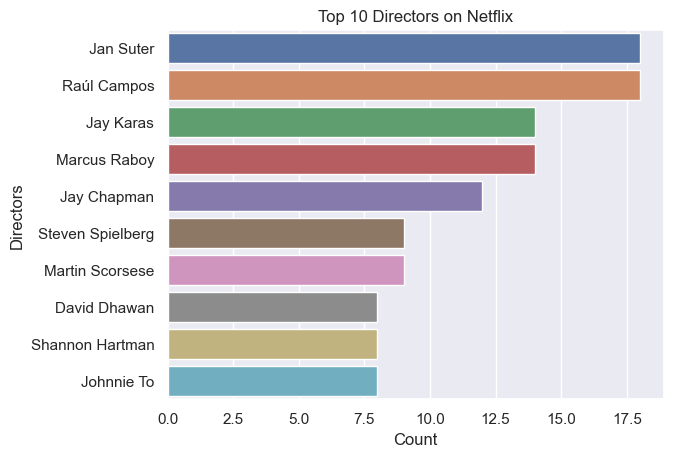

In [47]:
sns.countplot(y=filtered_directors,order=filtered_directors.value_counts().index[:10])
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

### Top 10 Actors

In [48]:
casts = df[df['cast']!='No Cast'].set_index('title')['cast'].str.split(', ',expand=True).stack().reset_index(level=1,drop=True)


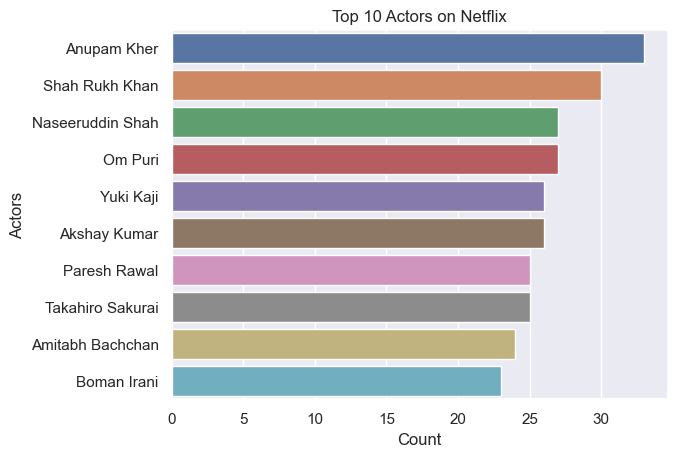

In [49]:
sns.countplot(y=casts,order=casts.value_counts().index[:10])
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Count')
plt.ylabel('Actors')
plt.show()

###  International Movies compared to International TV Shows

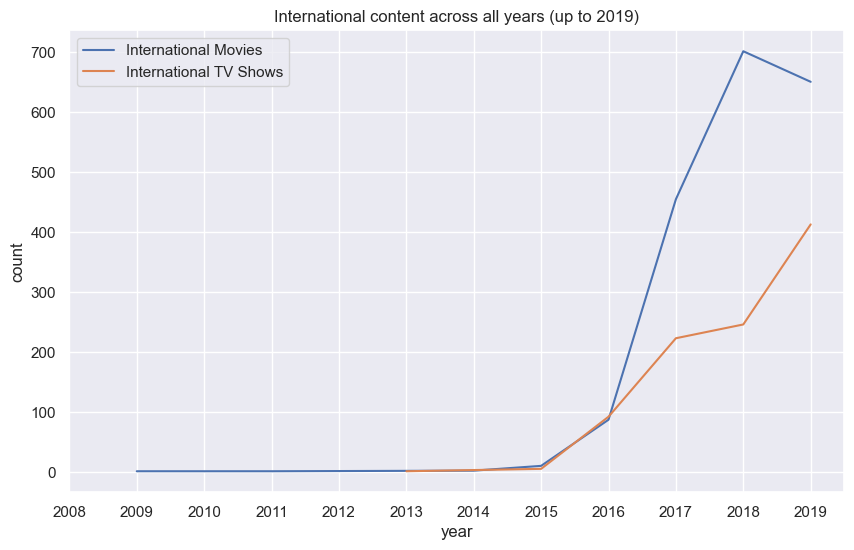

In [50]:
international_movies = df[df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2020]

international_shows = df[df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2020]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

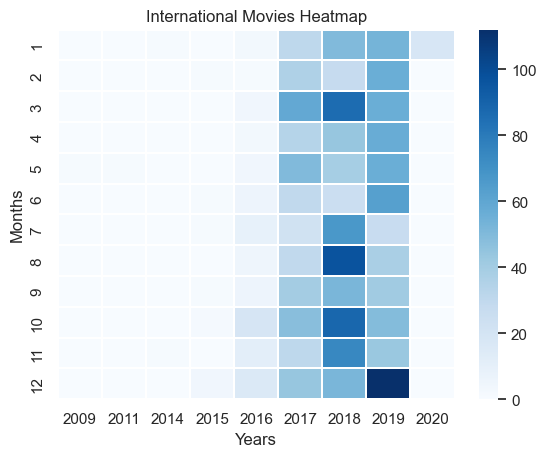

In [51]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="Blues")
plt.title("International Movies Heatmap")
plt.ylabel("Months")
plt.xlabel("Years")
plt.show()

- We can see that a majority of international movies were added throughout the year in 2018. Then in December 2019, Netflix added the most international movie content.

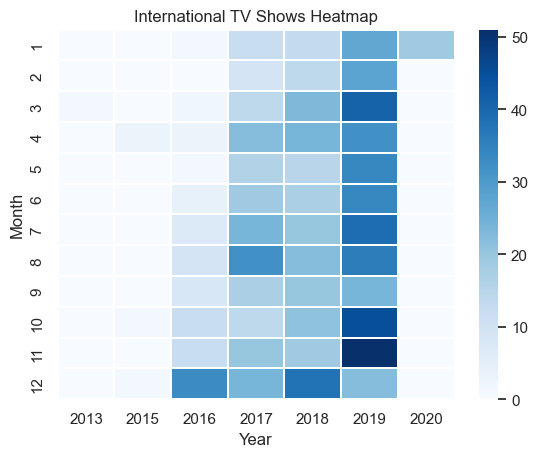

In [52]:
intsho_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T
sns.heatmap(intsho_month_year_df, linewidths=0.025, cmap="Blues")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

- We can see that the majority of international TV shows were added throughout the year 2019.